In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skvideo.io
import cv2
import scipy.ndimage
from matplotlib import animation, rc
import fisheye
%matplotlib inline

In [61]:
df = pd.read_csv('R:/output.csv')

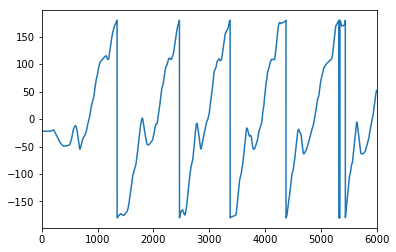

In [62]:
df.orientation_x.apply(lambda x: x if (x < 180.0) else x - 360.0).plot()

In [3]:
filename = 'C:/Users/corey/Desktop/output.mp4'
videodata = skvideo.io.vread(filename)
print(videodata.shape)

(6203, 480, 640, 3)


In [9]:
checkerboard_filename = 'C:/Users/corey/Desktop/checkerboard2.mp4'
checkerboard_videodata = skvideo.io.vread(checkerboard_filename)
print(checkerboard_videodata.shape)

(252, 480, 640, 3)


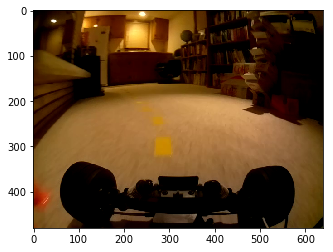

In [66]:
plt.imshow(videodata[200])

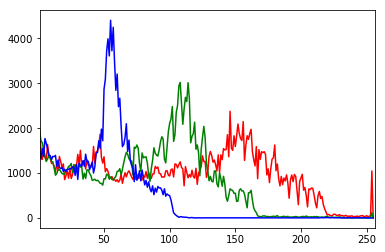

In [67]:
img = videodata[200]
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[1,256])
    plt.plot(histr,color = col)
    plt.xlim([1,256])
plt.show()

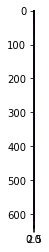

In [44]:
plt.imshow(img[:][:][1])

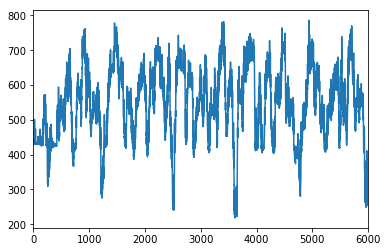

In [59]:
df.steering_servo_voltage.plot()

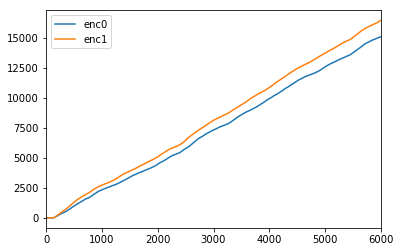

In [60]:
pd.DataFrame({'enc0': df.encoder0_count.cumsum(), 'enc1': df.encoder1_count.cumsum()}).plot()

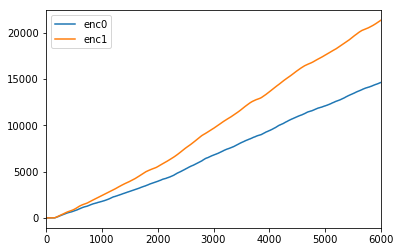

In [66]:
pd.DataFrame({'enc0': df.encoder0_count.cumsum(), 'enc1': df.encoder1_count.cumsum()}).plot()

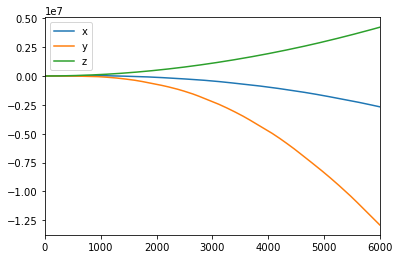

In [69]:
pd.DataFrame({'x': df.acceleration_x.cumsum().cumsum(), 'y': df.acceleration_y.cumsum().cumsum(), 'z': df.acceleration_z.cumsum().cumsum()}).plot()

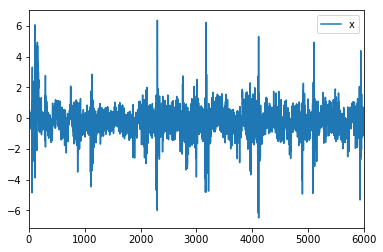

In [71]:
pd.DataFrame({'x': df.acceleration_x}).plot()

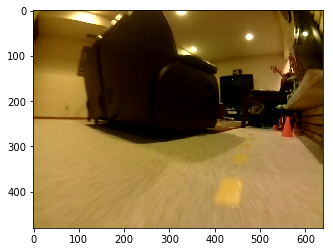

In [72]:
plt.imshow(img)

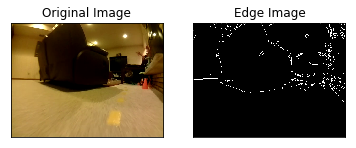

In [79]:
edges = cv2.Canny(img,100,110)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [26]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

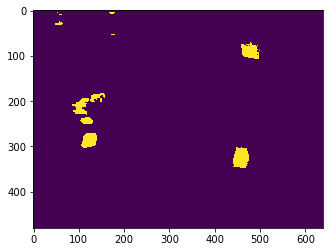

In [59]:
plt.imshow(yuv[:,:,2]<65)

In [50]:
np.max(yuv[:,:,1])

181

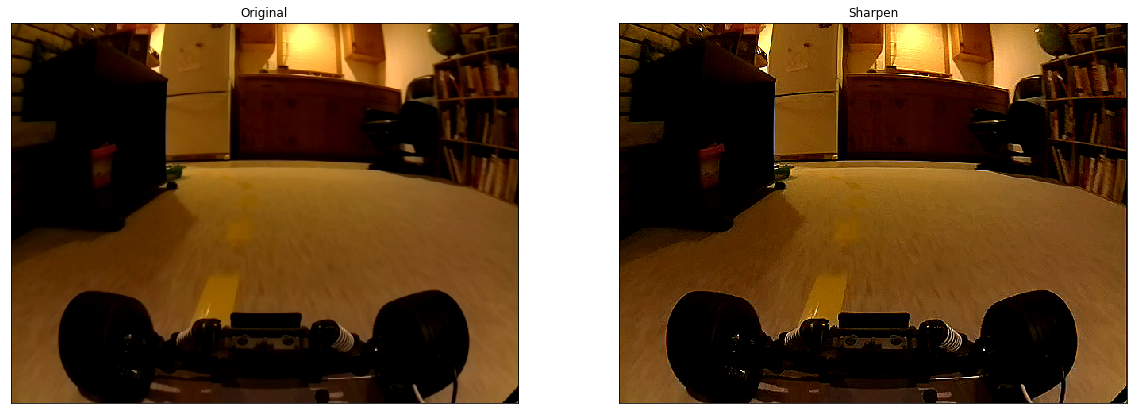

In [76]:
img = videodata[260]
kernel = np.ones((5,5),np.float32)/25
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")
dst = cv2.filter2D(img,-1,sharpen)
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Sharpen')
plt.xticks([]), plt.yticks([])
plt.show()

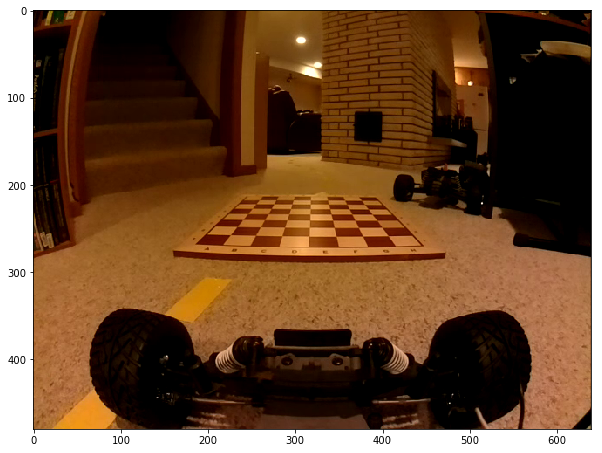

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(checkerboard_videodata[200])

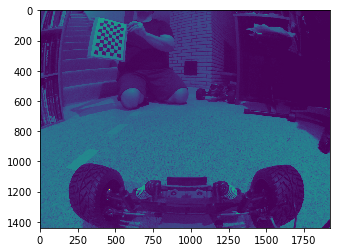

In [8]:
#img = checkerboard_videodata[201]
img = scipy.ndimage.imread('R:/marv/bin/experiments/calib/output14.jpg')
resized_img = cv2.resize(img, (640, 480))
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

In [9]:
found, corners = cv2.findChessboardCorners(gray, (9,6))
found, corners

(True, array([[[ 387.44219971,  268.0340271 ]],
 
        [[ 391.41043091,  243.48387146]],
 
        [[ 395.67733765,  218.22341919]],
 
        [[ 399.10699463,  194.78514099]],
 
        [[ 403.46136475,  171.52355957]],
 
        [[ 408.42980957,  149.73109436]],
 
        [[ 412.70275879,  128.1264801 ]],
 
        [[ 416.98709106,  107.19924927]],
 
        [[ 422.31445312,   87.37377167]],
 
        [[ 412.9715271 ,  271.77844238]],
 
        [[ 416.71731567,  246.59608459]],
 
        [[ 420.33361816,  222.90267944]],
 
        [[ 424.14169312,  199.06938171]],
 
        [[ 427.97311401,  176.79702759]],
 
        [[ 432.49575806,  154.10198975]],
 
        [[ 436.6272583 ,  132.62072754]],
 
        [[ 440.78225708,  112.44959259]],
 
        [[ 445.11633301,   92.59114075]],
 
        [[ 438.40213013,  275.12524414]],
 
        [[ 441.66421509,  250.65486145]],
 
        [[ 444.50204468,  226.92904663]],
 
        [[ 448.43789673,  203.8258667 ]],
 
        [[ 452.1628418 ,  

In [344]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.drawChessboardCorners(gray, patternSize=(6,7), corners=corners, patternWasFound=found))

NameError: name 'found' is not defined

In [341]:
img = scipy.ndimage.imread('D:/Downloads/opencv-3.3.0/samples/data/left01.jpg')
gray = img

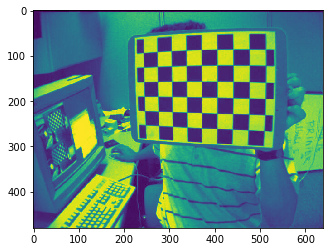

In [342]:
plt.imshow(img)

In [343]:
objp = np.zeros((6*7,3), np.float32)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
objpoints = []
imgpoints = []
cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
objpoints.append(objp)
imgpoints.append(corners)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
print(roi)
plt.imshow(gray)

error: ..\..\..\modules\calib3d\src\calibration.cpp:3064: error: (-215) ni == ni1 in function cv::collectCalibrationData


0 0 0 0


C:\Users\corey\Anaconda2\envs\rustler\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))
C:\Users\corey\Anaconda2\envs\rustler\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


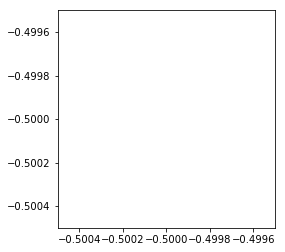

In [66]:
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
x,y,w,h = roi
print(x, y, w, h)
dst = dst[y:y+h, x:x+w]
plt.imshow(dst)

C:\Users\corey\Anaconda2\envs\rustler\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))
C:\Users\corey\Anaconda2\envs\rustler\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


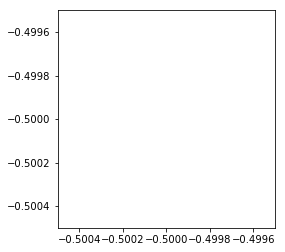

In [67]:
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(1280,960),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.imshow(dst)

R:/marv/bin/experiments/calib\output13.jpg
found
R:/marv/bin/experiments/calib\output07.jpg
found
R:/marv/bin/experiments/calib\output17.jpg
found
R:/marv/bin/experiments/calib\output03.jpg
found
R:/marv/bin/experiments/calib\output16.jpg
found
R:/marv/bin/experiments/calib\output15.jpg
found
R:/marv/bin/experiments/calib\output09.jpg
found
R:/marv/bin/experiments/calib\output01.jpg
found
R:/marv/bin/experiments/calib\output10.jpg
found
R:/marv/bin/experiments/calib\output00.jpg
R:/marv/bin/experiments/calib\output08.jpg
found
R:/marv/bin/experiments/calib\output02.jpg
found
R:/marv/bin/experiments/calib\output04.jpg
found
R:/marv/bin/experiments/calib\output14.jpg
found
R:/marv/bin/experiments/calib\output18.jpg
found
R:/marv/bin/experiments/calib\output06.jpg
found
R:/marv/bin/experiments/calib\output19.jpg
R:/marv/bin/experiments/calib\output05.jpg
found
R:/marv/bin/experiments/calib\output11.jpg
found
R:/marv/bin/experiments/calib\output12.jpg
found


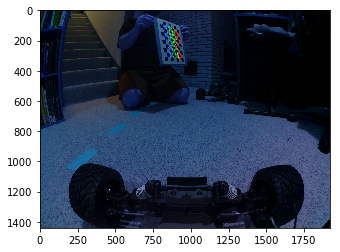

In [3]:
import numpy as np
import cv2
import glob

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('R:/marv/bin/experiments/calib/*.jpg')

for fname in images:
    print(fname)
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        print('found')
        objpoints.append(objp)

        cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners,ret)
        plt.imshow(img)
        #cv2.waitKey(500)

#cv2.destroyAllWindows()

(1028, 544, 384, 252)


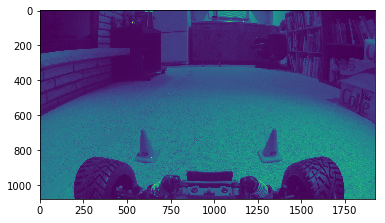

In [274]:
fname = 'R:/marv/bin/experiments/output.jpg'
img = cv2.imread(fname)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
print(roi)
plt.imshow(gray)

In [18]:
img.shape[:2]

(1440, 1920)

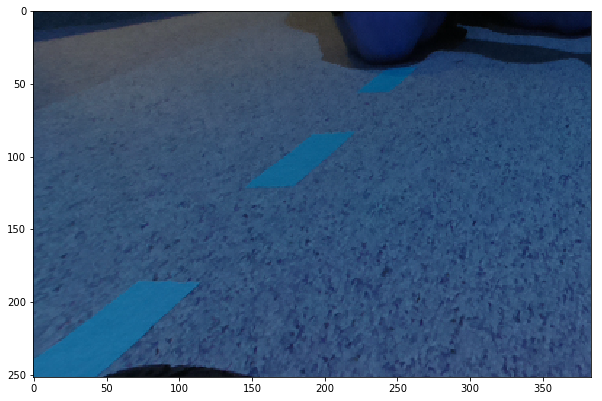

In [345]:
# undistort
img = cv2.imread('R:/marv/bin/experiments/calib/output01.jpg')
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
plt.figure(figsize=(10, 10))
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)
plt.imshow(dst)

In [346]:
img = cv2.imread(fname)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.fisheye.calibrate(objpoints, imgpoints, gray.shape[::-1],None,None)
h,  w = img.shape[:2]
newcameramtx, roi=cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(mtx,dist,(w,h),1,(w,h))
print(roi)
plt.imshow(gray)

error: ..\..\..\modules\calib3d\src\fisheye.cpp:695: error: (-215) objectPoints.type() == CV_32FC3 || objectPoints.type() == CV_64FC3 in function cv::fisheye::calibrate


In [31]:
objpoints, imgpoints

([array([[ 0.,  0.,  0.],
         [ 1.,  0.,  0.],
         [ 2.,  0.,  0.],
         [ 3.,  0.,  0.],
         [ 4.,  0.,  0.],
         [ 5.,  0.,  0.],
         [ 6.,  0.,  0.],
         [ 7.,  0.,  0.],
         [ 8.,  0.,  0.],
         [ 0.,  1.,  0.],
         [ 1.,  1.,  0.],
         [ 2.,  1.,  0.],
         [ 3.,  1.,  0.],
         [ 4.,  1.,  0.],
         [ 5.,  1.,  0.],
         [ 6.,  1.,  0.],
         [ 7.,  1.,  0.],
         [ 8.,  1.,  0.],
         [ 0.,  2.,  0.],
         [ 1.,  2.,  0.],
         [ 2.,  2.,  0.],
         [ 3.,  2.,  0.],
         [ 4.,  2.,  0.],
         [ 5.,  2.,  0.],
         [ 6.,  2.,  0.],
         [ 7.,  2.,  0.],
         [ 8.,  2.,  0.],
         [ 0.,  3.,  0.],
         [ 1.,  3.,  0.],
         [ 2.,  3.,  0.],
         [ 3.,  3.,  0.],
         [ 4.,  3.,  0.],
         [ 5.,  3.,  0.],
         [ 6.,  3.,  0.],
         [ 7.,  3.,  0.],
         [ 8.,  3.,  0.],
         [ 0.,  4.,  0.],
         [ 1.,  4.,  0.],
         [ 2

In [392]:
import fisheye
import os
import glob
import cv2

base_path = r'R:/marv/bin/experiments/calib640'
NX, NY = 9, 6


imgs_paths = glob.glob(os.path.join(base_path, '*.jpg'))

fe = fisheye.FishEye(nx=NX, ny=NY, verbose=True)
rms, K, D, rvecs, tvecs = fe.calibrate(
    imgs_paths,
    show_imgs=True
)

fe.save('./calib.dat')




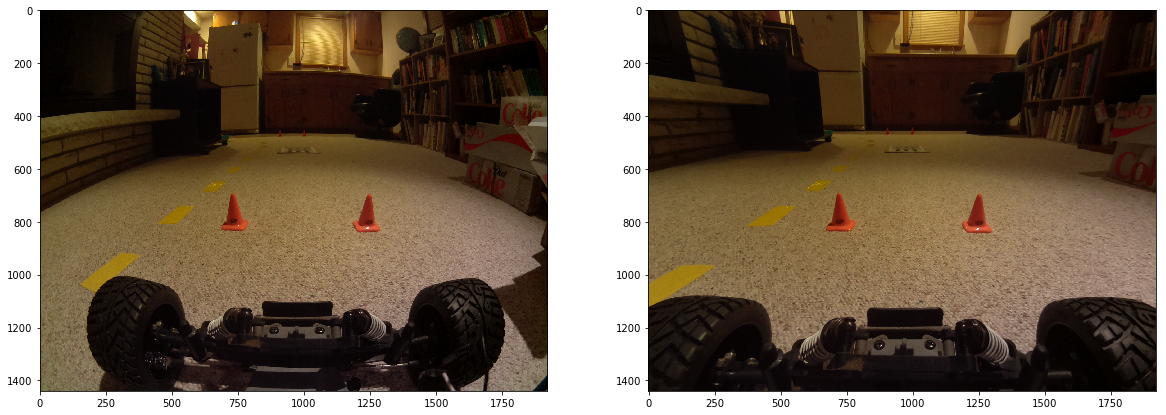

In [353]:
img = cv2.imread(fname)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

undist_img = fe.undistort(img, undistorted_size=(1920, 1440))
plt.imsave('C:/Users/corey/Desktop/undist_img.jpg', undist_img)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(undist_img)


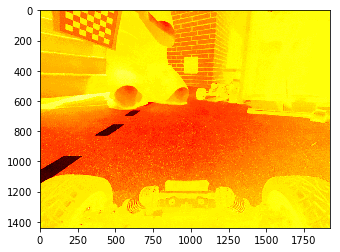

In [30]:
yuv = cv2.cvtColor(undist_img, cv2.COLOR_RGB2YUV)
plt.imshow(yuv[:,:,2], cmap="hot")

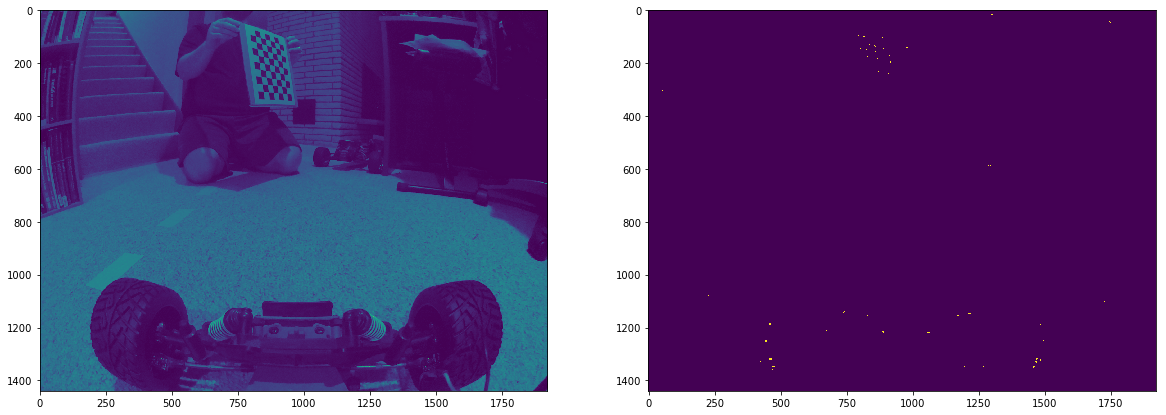

In [33]:
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(gray)
plt.subplot(1,2,2)
plt.imshow(dst)


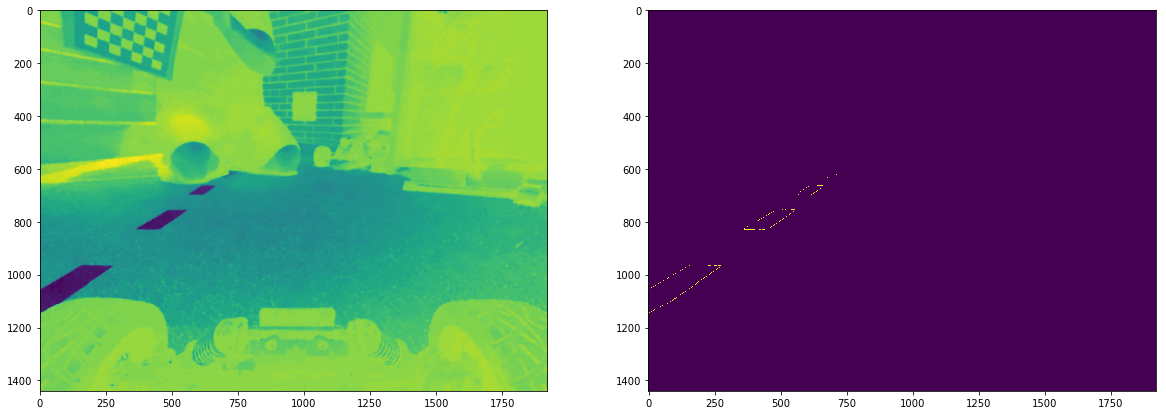

In [76]:
gray = cv2.bilateralFilter(yuv[:,:,2], 11, 17, 17)
edged = cv2.Canny(gray, 30, 70)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(gray)
plt.subplot(1,2,2)
plt.imshow(edged)

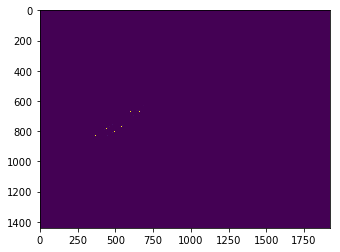

In [81]:
im2, contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im3 = cv2.drawContours(im2, contours, 0, (0,255,0), 3)
plt.imshow(im3)

In [57]:
result[2]

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [-1,  2, -1, -1]]], dtype=int32)

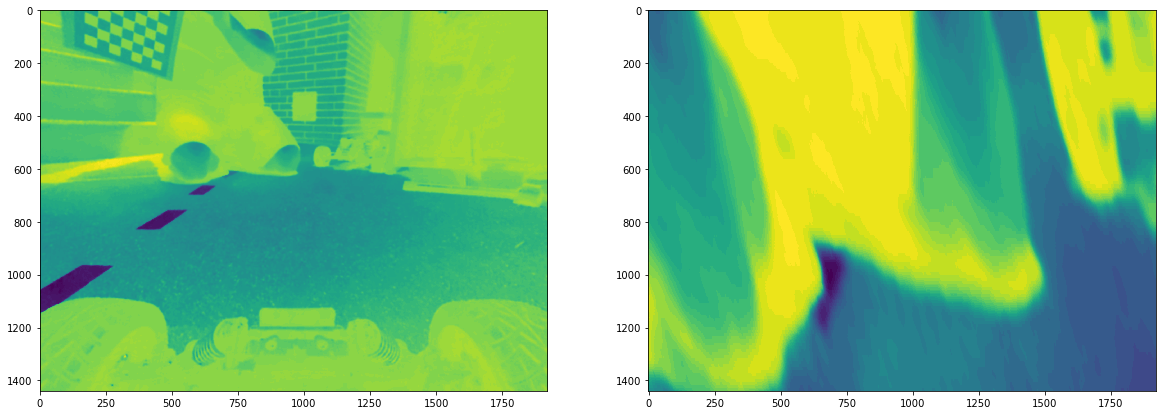

In [218]:
M = np.array([[4.0, 4.0, -4500.0],
              [0.0, 15.0, -8000.0],
              [0.0, 0.0004, 1.0]])
warped = cv2.warpPerspective(gray, M, (gray.shape[1],gray.shape[0]))
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(gray)
plt.subplot(1,2,2)
plt.imshow(warped)

In [364]:

src_pts = np.array([[719,836],
                    [904,471],
                    [1000,471],
                    [1254,836]])

dst_pts = np.array([[850,1900],
                    [850,100],
                    [1110,100],
                    [1110,1900]])
M2, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

In [365]:
M2

array([[ -5.52614876e-01,  -2.45299280e+00,   1.48148740e+03],
       [  5.65036628e-15,  -5.86330789e+00,   2.74121377e+03],
       [  3.00666152e-18,  -2.55635332e-03,   1.00000000e+00]])

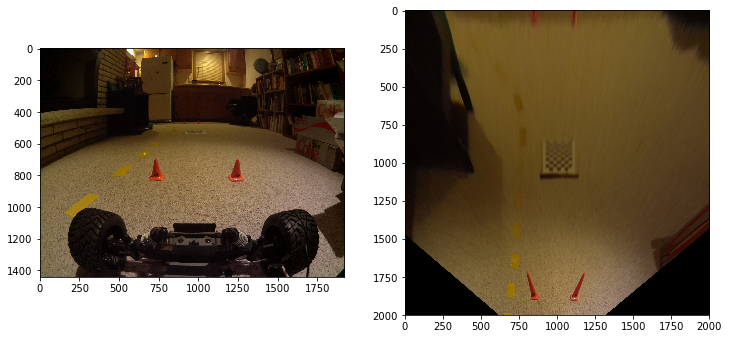

In [366]:
warped = cv2.warpPerspective(undist_img, M2, (2000,2000))
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(warped)

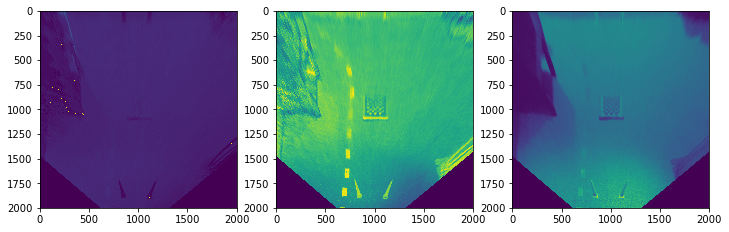

In [372]:
warped_hsv = cv2.cvtColor(warped, cv2.COLOR_RGB2HSV)
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(warped_hsv[:,:,0])
plt.subplot(1,3,2)
plt.imshow(warped_hsv[:,:,1])
plt.subplot(1,3,3)
plt.imshow(warped_hsv[:,:,2])


In [325]:
warped_hsv[1000,1500,0]

21

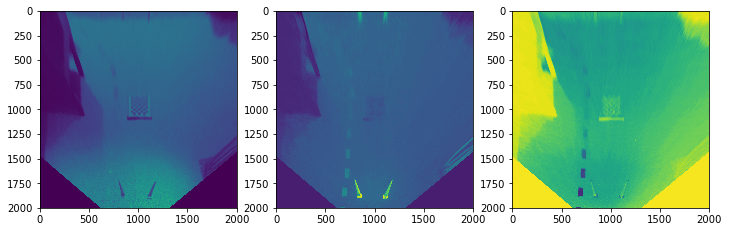

In [371]:
warped_cmy = cv2.cvtColor(warped, cv2.COLOR_RGB2YCR_CB)
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(warped_cmy[:,:,0])
plt.subplot(1,3,2)
plt.imshow(warped_cmy[:,:,1])
plt.subplot(1,3,3)
plt.imshow(warped_cmy[:,:,2])


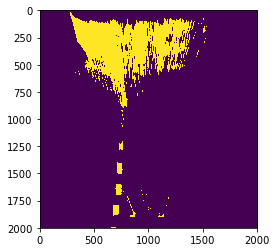

In [379]:
plt.imshow(warped_cmy[:,:,2]<98)

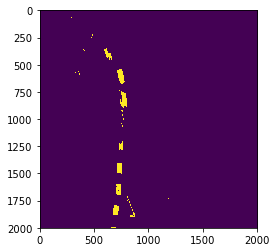

In [389]:
plt.imshow((warped_hsv[:,:,1]>200)&(warped_cmy[:,:,2]<98))